In [1]:
##############
############## EXPLORE DATA
##############

In [2]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")
test = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/test.csv")
sample = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/sample_submission.csv")
trains = train[:5000]
tests = test[:5000]

In [5]:
trains.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [6]:
tests.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [7]:
sample.head()

,ID,PredictedProb
0,0,0.5
1,1,0.5
2,2,0.5
3,7,0.5
4,10,0.5


In [8]:
trainclean = trains.fillna(0).head()
trainclean

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,C,0.000000,9.191265,0.000000,0.000000,2.301630,...,0.000000,0.000000,0.598896,AF,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,0.000000,0.000000,C,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Z,0.000000,0.000000,0.000000,0,0.000000,0.000000


In [9]:
#sns.factorplot('target',data=trainclean,kind='count',size=3)
#sns.factorplot('v3',data=trainclean,kind='count',size=3)
#sns.factorplot('target',data=trains,kind='count',size=3)
#sns.factorplot('v3',data=trains,kind='count',size=3)

In [10]:
trains.loc[trains['v3'] == "A"]

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
1031,2032,1,2.138728,11.262827,A,5.418991,9.845327,1.926782,2.581889,0.043371,...,6.666666,0.935229,0.278880,V,1.444342,2.492774,4.463485,2,1.223880,2.926830
1360,2694,1,1.150855,12.118168,A,4.551629,9.191264,2.721618,2.931570,2.301630,...,6.412213,1.420637,0.598896,AF,1.444587,2.012053,1.957825,1,1.092838,1.553397
1464,2902,1,1.428227,6.031662,A,5.546056,10.741116,2.036188,2.330520,8.022925,...,6.402640,3.043932,11.549883,AZ,1.452025,2.623644,5.433482,1,1.962733,1.350212
1933,3896,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AR,NaN,NaN,NaN,1,NaN,NaN
2013,4056,1,1.735731,11.334333,A,3.825931,8.643161,2.048475,2.197029,11.245300,...,5.398772,3.486510,1.472451,BH,2.055575,6.215794,1.875762,2,1.651245,2.068966
2025,4074,1,1.767868,4.329228,A,4.421207,10.827169,2.858849,2.516424,0.220787,...,7.142856,3.361024,0.028551,BL,1.436129,4.643639,2.784175,1,1.183544,2.566844
3371,6700,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BH,NaN,NaN,NaN,2,NaN,NaN
3399,6760,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AC,NaN,NaN,NaN,1,NaN,NaN
4790,9572,0,2.847306,8.996227,A,5.348026,10.875775,2.219523,2.486836,5.234731,...,6.301370,2.134766,7.748497,AR,1.056036,5.315917,5.164720,1,1.237786,3.999999


In [11]:
trainclean.loc[trainclean['v3'] == 'A']

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131


In [12]:
################
################ CLEAN DATA
################

In [13]:
### Float Data

In [14]:
trains.loc[:, trains.dtypes == np.float64].head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Do I have NaN values?
trains.loc[:, trains.dtypes == np.float64].isnull().sum().sum()

219324

In [16]:
### Type of distribution of my data

# Normalize data
contdata = trains.loc[:, trains.dtypes == np.float64].apply(lambda x: (x - x.mean()) / (x.max() - x.min())).dropna()
contdata.head()
#sns.factorplot(x='ID',y='v1',data=trains,kind='bar',size=15)
# mean value seems to be a good election since no common value

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
0,-0.036223,0.075092,-0.025781,-0.048837,0.024425,0.128517,-0.077792,0.047420,-0.175105,0.112863,...,-0.034067,-0.188815,0.058646,-0.090062,-0.045167,0.010165,-0.010799,0.001363,-0.114428,0.113545
2,-0.083882,-0.118183,0.039682,-0.210128,0.214218,0.266094,-0.077456,0.180753,-0.141772,-0.082351,...,0.115174,-0.050136,0.125313,-0.062457,-0.046282,0.007726,0.062377,-0.070247,-0.092917,-0.054522
3,-0.101695,0.051184,0.014958,0.182415,-0.044542,-0.089164,-0.069841,-0.004304,0.591561,0.102785,...,-0.019314,-0.077412,0.009559,-0.100078,-0.046841,-0.021010,-0.025220,-0.001286,-0.023700,-0.068721
6,-0.089242,-0.004906,-0.082817,0.077681,-0.068141,-0.128903,-0.075126,-0.202016,0.058228,0.094296,...,-0.063509,-0.050740,-0.167539,-0.089903,-0.042767,0.128161,-0.145697,0.020560,0.027440,-0.075082
8,0.054131,0.060112,-0.050098,-0.213898,-0.116684,-0.031360,-0.077645,0.102976,0.327673,0.068288,...,0.014965,-0.143110,0.066054,-0.096526,-0.046022,-0.041499,0.212685,-0.071451,-0.067844,0.161164


In [17]:
# plot a couple of features to see the distribution they follow
#f, ax = plt.subplots(5)
#sns.distplot(contdata['v1'], bins=25, kde=False, rug=True, ax=ax[0])
#sns.distplot(contdata['v15'], bins=25, kde=False, rug=True, ax=ax[1])
#sns.distplot(contdata['v34'], bins=25, kde=False, rug=True, ax=ax[2])
#sns.distplot(contdata['v45'], bins=25, kde=False, rug=True, ax=ax[3])
#sns.distplot(contdata['v60'], bins=25, kde=False, rug=True, ax=ax[4])
#sns.distplot(contdata['v78'], bins=25, kde=False, rug=True, ax=ax[5])
#sns.distplot(contdata['v90'], bins=25, kde=False, rug=True, ax=ax[6])
#sns.distplot(contdata['v108'], bins=25, kde=False, rug=True, ax=ax[7])
#sns.distplot(contdata['v130'], bins=25, kde=False, rug=True, ax=ax[8])

In [18]:
# substitute in float data NaN by mean value 
# save values into a numpy array(n_samples,n_features)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(trains.loc[:, trains.dtypes == np.float64])
X = trains.loc[:, trains.dtypes == np.float64]
floatFeatures = pd.DataFrame(imp.transform(X))
floatFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,1.478275,6.817772,4.182575,9.191265,2.400521,2.447117,2.301630,9.108172,1.312910,15.511311,...,1.164874,2.457737,6.779235,2.766150,0.598896,1.611466,2.965299,1.957825,1.593623,1.592920
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,1.478275,6.817772,4.182575,8.641835,2.400521,2.447117,0.391733,9.108172,1.050328,15.511311,...,1.164874,2.457737,6.779235,2.766150,0.137220,1.611466,2.965299,1.789658,1.593623,1.592920


In [19]:
# plot a couple of features to see the distribution they follow once the median is applied to NaN
#contdata2 = floatFeatures.apply(lambda x: (x - x.mean()) / (x.max() - x.min())).dropna()
#f, ax = plt.subplots(5, sharex=True, figsize=(10,8))
#sns.distplot(contdata2[0], bins=25, kde=False, rug=True, ax=ax[0])
#sns.distplot(contdata2[15], bins=25, kde=False, rug=True, ax=ax[1])
#sns.distplot(contdata2[29], bins=25, kde=False, rug=True, ax=ax[2])
#sns.distplot(contdata2[39], bins=25, kde=False, rug=True, ax=ax[3])
#sns.distplot(contdata2[51], bins=25, kde=False, rug=True, ax=ax[4])
#sns.distplot(contdata2[63], bins=25, kde=False, rug=True, ax=ax[5])
#sns.distplot(contdata2[74], bins=25, kde=False, rug=True, ax=ax[6])
#sns.distplot(contdata2[89], bins=25, kde=False, rug=True, ax=ax[7])
#sns.distplot(contdata2[107], bins=25, kde=False, rug=True, ax=ax[8])

In [20]:
### Integers Categorical Data

In [21]:
trains.loc[:, trains.dtypes == np.int].head()

,ID,target,v38,v62,v72,v129
0,3,1,0,1,1,0
1,4,1,0,2,2,0
2,5,1,0,1,3,2
3,6,1,0,1,2,1
4,8,1,0,1,1,0


In [22]:
# Do I have NaN values?
trains.loc[:, trains.dtypes == np.int].isnull().sum().sum()

0

In [23]:
# No NaN values

In [24]:
#sns.factorplot('target',data=trains,kind='count',size=3)
#sns.factorplot('v38',data=trains,kind='count',size=3)
#sns.factorplot('v62',data=trains,kind='count',size=3)
#sns.factorplot('v72',data=trains,kind='count',size=3)
#sns.factorplot('v129',data=trains,kind='count',size=3)

In [25]:
# Transform each category into one boolean feature

In [26]:
enc = preprocessing.OneHotEncoder()
columns = trains.columns[(trains.dtypes == np.int)]
# exclude first column of IDs
enc = enc.fit(trains.loc[:, columns[1:]])

In [27]:
columns

Index(['ID', 'target', 'v38', 'v62', 'v72', 'v129'], dtype='object')

In [28]:
trains.loc[:, columns[0]].unique()

array([   3,    4,    5, ..., 9970, 9972, 9973])

In [29]:
trains.loc[:, columns[1:]].head()

,target,v38,v62,v72,v129
0,1,0,1,1,0
1,1,0,2,2,0
2,1,0,1,3,2
3,1,0,1,2,1
4,1,0,1,1,0


In [30]:
x = enc.transform(trains.loc[:, columns[1:]]).toarray()
intFeatures = pd.DataFrame(x)
intFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
### Objects Categorical Data

In [32]:
trains.loc[:, trains.dtypes == np.object].head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


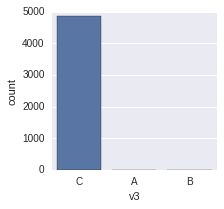

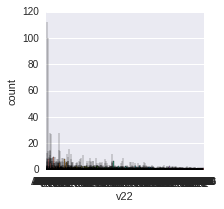

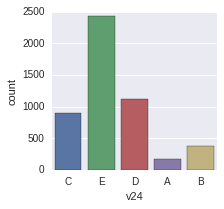

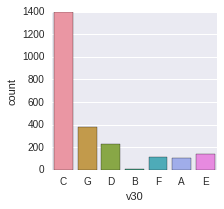

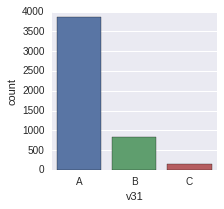

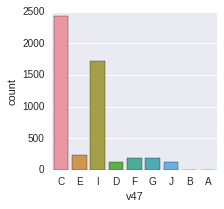

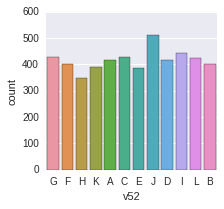

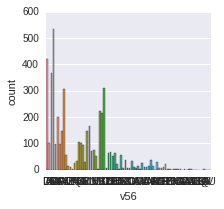

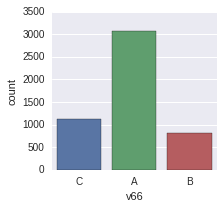

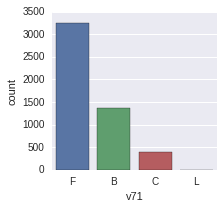

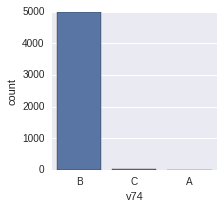

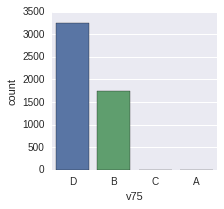

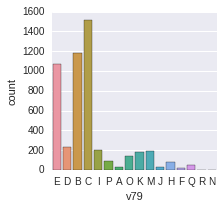

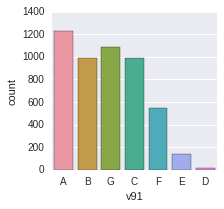

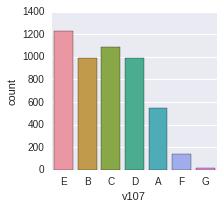

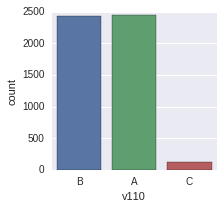

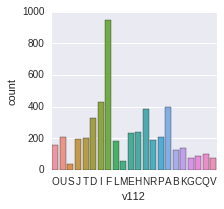

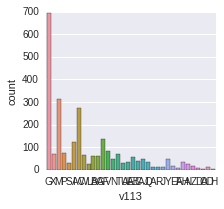

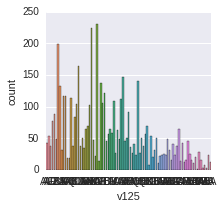

In [33]:
#sns.factorplot('v3',data=trains,kind='count',size=3)
#sns.factorplot('v22',data=trains,kind='count',size=3)
#sns.factorplot('v24',data=trains,kind='count',size=3)
#sns.factorplot('v30',data=trains,kind='count',size=3)
#sns.factorplot('v31',data=trains,kind='count',size=3)
#sns.factorplot('v47',data=trains,kind='count',size=3)
#sns.factorplot('v52',data=trains,kind='count',size=3)
#sns.factorplot('v56',data=trains,kind='count',size=3)
#sns.factorplot('v66',data=trains,kind='count',size=3)
#sns.factorplot('v71',data=trains,kind='count',size=3)
#sns.factorplot('v74',data=trains,kind='count',size=3)
#sns.factorplot('v75',data=trains,kind='count',size=3)
#sns.factorplot('v79',data=trains,kind='count',size=3)
#sns.factorplot('v91',data=trains,kind='count',size=3)
#sns.factorplot('v107',data=trains,kind='count',size=3)
#sns.factorplot('v110',data=trains,kind='count',size=3)
#sns.factorplot('v112',data=trains,kind='count',size=3)
#sns.factorplot('v113',data=trains,kind='count',size=3)
#sns.factorplot('v125',data=trains,kind='count',size=3)

In [34]:
# Do I have NaN values?
trains.loc[:, trains.dtypes == np.object].isnull().sum().sum()

5663

In [35]:
# First transform object data type into categorical
# Second change categorical string data into integers

In [36]:
# change np.object into np.categorical
columns = trains.columns[(trains.dtypes == np.object)]  
for i in range(len(columns)):
    # convert to categorical
    trains[columns[i]] = trains[columns[i]].astype('category')
    # convert to integers (NaN == -1)
    trains[columns[i]] = trains[columns[i]].cat.codes

In [37]:
# Third substitute in float data NaN by mean value 
imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
imp.fit(trains[columns[:]])
X = trains[columns[:]]
X.head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,2,2727,2,2,0,2,6,54,2,2,1,3,4,0,4,1,14,-1,21
1,2,1256,2,2,0,4,6,66,0,2,1,3,3,1,1,0,20,15,6
2,2,1138,4,-1,0,2,5,12,0,0,1,1,4,6,2,1,18,-1,5
3,2,250,3,2,1,2,7,31,0,2,1,3,1,1,1,1,9,-1,63
4,2,1305,4,-1,0,7,7,-1,2,2,1,3,2,6,2,0,19,15,88


In [38]:
objpreFeatures = pd.DataFrame(imp.transform(X))
objpreFeatures.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2,2727,2,2,0,2,6,54,2,2,1,3,4,0,4,1,14,15,21
1,2,1256,2,2,0,4,6,66,0,2,1,3,3,1,1,0,20,15,6
2,2,1138,4,2,0,2,5,12,0,0,1,1,4,6,2,1,18,15,5
3,2,250,3,2,1,2,7,31,0,2,1,3,1,1,1,1,9,15,63
4,2,1305,4,2,0,7,7,31,2,2,1,3,2,6,2,0,19,15,88


In [39]:
# Forth Transform each category into one boolean feature

In [40]:
enc = preprocessing.OneHotEncoder()
enc = enc.fit(objpreFeatures)
x = enc.transform(objpreFeatures).toarray()
x

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.]])

In [41]:
intFeatures = pd.DataFrame(x)
intFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,3279,3280,3281,3282,3283,3284,3285,3286,3287,3288
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
class NullToNaNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transform_params):
        return X.fillna(np.nan)

class NaNToValueTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns=None,value=0):
        self.value = value
        self.columns = columns

    def get_feature_names(self):
        return self.columns

    def fit(self, X, y=None, **fit_params):
        if self.columns is None:
            self.columns = X.columns.tolist()
            self.values = [self.value]*len(self.columns)
        else:
            self.values = [self.value]
        return self

    def transform(self, X, **transform_params):
        X_ = X.copy()
        for col,val in zip(self.columns,self.values):
            X_.loc[All,[col]] = X_.loc[All,[col]].applymap(lambda x: val if pd.isnull(x) else x)
        return X_


class IntCategorizer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, boolean=False):
        self.columns = columns
        self.boolean = boolean

    def fit(self, X, y=None, **fit_params):
        if self.columns is None:
            self.columns = X.columns
        self.d = {}
        self.fnames = []
        for col in self.columns:
            w = X[col].notnull()
            uniq = X.ix[w, col].unique()
            names = list(map(lambda f: col+'_IS_'+f.replace(' ','_'),uniq))
            if not self.boolean:
                self.fnames.extend(names)
            else:
                self.fnames.extend([names[-1]])
            vals = enumerate(uniq, 1)
            vals = [(x, y) for (y, x) in vals]
            self.d[col] = defaultdict(lambda: np.nan, vals)
        return self

    def get_feature_names(self):
        return self.fnames

    def transform(self, X, **transform_params):
        X_ = X.copy()
        for col in self.columns:
            w = X_[col].notnull()
            X_.ix[w, col] = X_.ix[w, col].map(lambda x: self.d[col][x])
        return X_
    
    
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self,columns=None,add_feature_names=False, to_numeric=False):
        self.columns = columns
        self.add_feature_names = add_feature_names
        self.to_numeric = to_numeric

    def fit(self, X, y=None, **fit_params):
        if self.columns is None:
            self.columns = X.columns
        return self

    def get_feature_names(self):
        return self.columns

    def transform(self, X, **transform_params):
        if self.to_numeric:
            X = X.loc[All,self.columns].apply(pd.to_numeric,errors='coerce')
#            X = X.loc[All,self.columns].convert_objects(convert_numeric=True)
        else:
            X = X.loc[All,self.columns]
        return X


def simple_classifier(Classifier):
    '''
    Returns an estimator that estimates the return probability of order
    positions which uses only the information available at the time shipping.
    '''
    pipeline = make_pipeline(
        NullToNaNTransformer(),
        make_union(
            make_pipeline(
                ColumnExtractor(columns=['a','b']),
                Imputer(strategy='median')
            ),
            make_pipeline(
                ColumnExtractor(columns=['c']),
                NaNToValueTransformer(value = 'unkown'),
                IntCategorizer(),
                Imputer(strategy='most_frequent'),
                OneHotEncoder()
            )
        ),
        Classifier()
        )
    return pipeline

pipe = simple_classifier(RandomForestClassifier)
pipe.fit(x_train,y_train)

y_predicted = pip.predict__proba(x_test)

NameError: name 'BaseEstimator' is not defined